# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Initial imports
import os
from pathlib import Path
import numpy as np
import pandas as pd
from dotenv import load_dotenv

import nltk as nltk
nltk.download('vader_lexicon')

from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

from newsapi import NewsApiClient

os.getcwd()
%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/adnanquaderi/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!

Bad key savefig.frameon in file /Users/adnanquaderi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /Users/adnanquaderi/opt/anaconda3/envs/pyvizenv/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.3.4/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /Users/adn

In [3]:
load_dotenv()
os.getcwd()

'/Users/adnanquaderi/Desktop/Penn/HW-NLP-NaturalLanguageProcessing'

In [4]:
# Read your api key environment variable
# YOUR CODE HERE!

api_key = os.getenv("news_api")


In [5]:
type(api_key)

str

In [6]:
# Create a newsapi client
# YOUR CODE HERE!

newsapi = NewsApiClient(api_key=api_key)


In [7]:
type(newsapi)

newsapi.newsapi_client.NewsApiClient

In [8]:
newsapi

In [9]:
# Fetch the Bitcoin news articles
# YOUR CODE HERE!

btc_articles = newsapi.get_everything(q="bitcoin AND crypto", language="en", page_size=100,
    sort_by="relevancy")
type(btc_articles)



dict

In [10]:
# btc_articles

In [11]:
print(f"Total articles about bitcoin: {btc_articles['totalResults']}")

Total articles about bitcoin: 3876


In [12]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!

eth_articles = newsapi.get_everything(q="ethereum AND crypto", language="en", page_size=100,
    sort_by="relevancy")
eth_articles


{'status': 'ok',
 'totalResults': 2020,
 'articles': [{'source': {'id': 'wired', 'name': 'Wired'},
   'author': 'Dan Goodin, Ars Technica',
   'title': 'A Software Bug Let Hackers Drain $31M From a Crypto Service',
   'description': "An attacker exploited a vulnerability in MonoX Finance's smart contract to inflate the price of its digital token and then cash out.",
   'url': 'https://www.wired.com/story/hackers-drain-31-million-from-crypto-service/',
   'urlToImage': 'https://media.wired.com/photos/61a8e032b7391d86bbd9a4c4/191:100/w_1280,c_limit/Sec_ars_GettyImages-1324841380.jpg',
   'publishedAt': '2021-12-02T23:45:00Z',
   'content': 'Blockchain startup MonoX Finance said on Wednesday that a hacker stole $31 million by exploiting a bug in software the service uses to draft smart contracts.\r\nThis story originally appeared on Ars Te… [+4372 chars]'},
  {'source': {'id': 'business-insider', 'name': 'Business Insider'},
   'author': 'prosen@insider.com (Phil Rosen)',
   'title': 'Whi

In [13]:
# eth_articles

In [14]:
print(f"Total articles about ethereum: {eth_articles['totalResults']}")

Total articles about ethereum: 2020


In [15]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!


btc_sentiments = []

for article in btc_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
btc_df = pd.DataFrame(btc_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
btc_df = btc_df[cols]

btc_df.head()


,date,text,compound,positive,negative,neutral
0,2021-12-03,"Indeed, as recently as November 2019 Agrawal w...",0.0000,0.000,0.000,1.000
1,2021-12-01,"Available for the same price, $99, on December...",0.1280,0.043,0.000,0.957
2,2021-12-01,Jack Dorsey is no fan of Mark Zuckerberg. He o...,-0.2732,0.114,0.136,0.751
3,2021-12-09,"A decade ago, cryptocurrencies were considered...",0.3444,0.149,0.111,0.740
4,2021-12-06,MicroStrategy CEO Michael SaylorJoe Raedle/Get...,0.2732,0.111,0.075,0.814


In [16]:
# Create the Ethereum sentiment scores DataFrame
# YOUR CODE HERE!

eth_sentiments = []

for article in eth_articles["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
            
        })
        
    except AttributeError:
        pass
    
# Create DataFrame
eth_df = pd.DataFrame(eth_sentiments)

# Reorder DataFrame columns
cols = ["date", "text", "compound", "positive", "negative", "neutral"]
eth_df = eth_df[cols]

eth_df.head()


,date,text,compound,positive,negative,neutral
0,2021-12-02,Blockchain startup MonoX Finance said on Wedne...,-0.0516,0.074,0.079,0.847
1,2021-12-10,White Castle double cheeseburger.Erin McDowell...,0.0000,0.000,0.000,1.000
2,2021-12-01,"Available for the same price, $99, on December...",0.1280,0.043,0.000,0.957
3,2021-12-30,"Crypto Street Restaurant, Clearwater Beach, Fl...",-0.1531,0.000,0.060,0.940
4,2021-12-06,MicroStrategy CEO Michael SaylorJoe Raedle/Get...,0.2732,0.111,0.075,0.814


In [17]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!

btc_df.describe()


,compound,positive,negative,neutral
count,100.000000,100.00000,100.000000,100.00000
mean,0.099905,0.06243,0.039030,0.89854
std,0.392928,0.07175,0.056843,0.08871
min,-0.802000,0.00000,0.000000,0.67300
25%,-0.051600,0.00000,0.000000,0.84025
50%,0.000000,0.04850,0.000000,0.92250
75%,0.403950,0.09675,0.068500,1.00000
max,0.927500,0.32700,0.246000,1.00000


In [18]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!

eth_df.describe()



,compound,positive,negative,neutral
count,100.000000,100.000000,100.000000,100.000000
mean,0.170987,0.083600,0.038280,0.878080
std,0.426447,0.085428,0.059013,0.098339
min,-0.822100,0.000000,0.000000,0.605000
25%,0.000000,0.000000,0.000000,0.814000
50%,0.177700,0.074000,0.000000,0.903000
75%,0.481000,0.134500,0.064750,0.946250
max,0.951700,0.395000,0.246000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum had higher mean positive score over bitcoin
    

Q: Which coin had the highest compound score?

A: Ethereum had the highest compound score

Q. Which coin had the highest positive score?

A: Ethereum had the highest positive score

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [19]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import reuters, stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

# Code to download corpora
import nltk
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')


[nltk_data] Downloading package reuters to
[nltk_data]     /Users/adnanquaderi/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adnanquaderi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adnanquaderi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adnanquaderi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [20]:

# ids = reuters.fileids(categories='gas')
# corpus = [reuters.raw(i) for i in ids]


# def process_text(doc):
#     sw = set(stopwords.words('english'))
#     regex = re.compile("[^a-zA-Z ]")
#     re_clean = regex.sub('', doc)
#     words = word_tokenize(re_clean)
#     lem = [lemmatizer.lemmatize(word) for word in words]
#     output = [word.lower() for word in lem if word.lower() not in sw]
#     return ' '.join(output)
# big_string = ' '.join(corpus)



# input_words = process_text(big_string)


In [29]:
# Instantiate the lemmatizer
# YOUR CODE HERE!

lemmatizer = WordNetLemmatizer()

# Create a list of stopwords
# YOUR CODE HERE!

sw = set(stopwords.words('english'))

# Expand the default stopwords list if necessary
# YOUR CODE HERE!

sw_addon = {'said', 'mln', 'kilolitres','kl'}

btc_articles = np.ravel(btc_articles)
type(btc_articles)

numpy.ndarray

In [30]:
# Complete the tokenizer function - version similar to class
def tokenizer_2(article):
    """Tokenizes text."""
    
    # Remove the punctuation from text
   
    regex = re.compile("[^a-zA-Z0-9. ]")
    re_clean = regex.sub('', article)

    # Create a tokenized list of the words
    
    words = word_tokenize(re_clean)
    
    # Lemmatize words into root words

    lem = [lemmatizer.lemmatize(word) for word in words]
    lem2 = [lemmatizer.lemmatize(word, pos='v') for word in lem]
    lem3 = [lemmatizer.lemmatize(word, pos='a') for word in lem2]

    # Convert the words to lowercase
    
    tokens = [word.lower() for word in words if word.lower() not in sw.union(sw_addon)]
    
    # Remove the stop words

    
    return tokens

In [34]:

btc_df['btc_tokens'] = btc_df.text.apply(tokenizer_2)


In [ ]:
# # Complete the tokenizer function - Alternate attempt (ignore)
# def tokenizer(text):
#     """Tokenizes text."""
    
#     stop = set(stopwords.words('english'))
    
#     # Create a list of the words
#     words = word_tokenize(text)

#     # Convert the words to lowercase
#     words = list(filter(lambda w: w.lower(), words))
    
#     # Remove the punctuation
#     words = list(filter(lambda t: t not in punctuation, words))
    
#     # Remove the stopwords
#     words = list(filter(lambda t: t.lower() not in stop, words))
    
#     # Lemmatize Words into root words
#     tokens = [lemmatizer.lemmatize(word) for word in words]
    
# #    return tokens

In [ ]:
# btc_df.text.apply(tokenizer)

In [ ]:
# btc_df['btc_tokens'] = btc_df.text.apply(tokenizer)
# btc_df.head(5)

In [36]:
# Create a new tokens column for Bitcoin
# YOUR CODE HERE!

btc_df.head(5)


,date,text,compound,positive,negative,neutral,btc_tokens
0,2021-12-03,"Indeed, as recently as November 2019 Agrawal w...",0.0000,0.000,0.000,1.000,"[indeed, recently, november, 2019, agrawal, st..."
1,2021-12-01,"Available for the same price, $99, on December...",0.1280,0.043,0.000,0.957,"[available, price, 99, december, 13ththe, ear,..."
2,2021-12-01,Jack Dorsey is no fan of Mark Zuckerberg. He o...,-0.2732,0.114,0.136,0.751,"[jack, dorsey, fan, mark, zuckerberg, ., told,..."
3,2021-12-09,"A decade ago, cryptocurrencies were considered...",0.3444,0.149,0.111,0.740,"[decade, ago, cryptocurrencies, considered, ri..."
4,2021-12-06,MicroStrategy CEO Michael SaylorJoe Raedle/Get...,0.2732,0.111,0.075,0.814,"[microstrategy, ceo, michael, saylorjoe, raedl..."


In [37]:
# Create a new tokens column for Ethereum
# YOUR CODE HERE!

eth_df['eth_tokens'] = eth_df.text.apply(tokenizer_2)
eth_df.head(5)

,date,text,compound,positive,negative,neutral,eth_tokens
0,2021-12-02,Blockchain startup MonoX Finance said on Wedne...,-0.0516,0.074,0.079,0.847,"[blockchain, startup, monox, finance, wednesda..."
1,2021-12-10,White Castle double cheeseburger.Erin McDowell...,0.0000,0.000,0.000,1.000,"[white, castle, double, cheeseburger.erin, mcd..."
2,2021-12-01,"Available for the same price, $99, on December...",0.1280,0.043,0.000,0.957,"[available, price, 99, december, 13ththe, ear,..."
3,2021-12-30,"Crypto Street Restaurant, Clearwater Beach, Fl...",-0.1531,0.000,0.060,0.940,"[crypto, street, restaurant, clearwater, beach..."
4,2021-12-06,MicroStrategy CEO Michael SaylorJoe Raedle/Get...,0.2732,0.111,0.075,0.814,"[microstrategy, ceo, michael, saylorjoe, raedl..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [38]:
from collections import Counter
from nltk import ngrams


In [39]:
tokenizer_2(btc_df.text.str.cat())

['indeed',
 'recently',
 'november',
 '2019',
 'agrawal',
 'still',
 'selfstyling',
 'cryptonaive',
 'fireside',
 'chat',
 'held',
 'twitters',
 'campus',
 'cryptocurrency',
 'entrepreneur',
 'joseph',
 'lubin',
 '.',
 'w',
 '3081',
 'charsavailable',
 'price',
 '99',
 'december',
 '13ththe',
 'ear',
 '1',
 'earbuds',
 'case',
 'black.image',
 'nothingnothings',
 'ear',
 '1',
 'earbuds',
 'launched',
 'earlier',
 'year',
 'fetching',
 'white',
 'transp',
 '1865',
 'charsjack',
 'dorsey',
 'fan',
 'mark',
 'zuckerberg',
 '.',
 'told',
 'rolling',
 'stone',
 'dinner',
 'chez',
 'zuck',
 'facebook',
 'ceo',
 'served',
 'goat',
 'killed',
 'meat',
 'cold',
 '.',
 'recently',
 'made',
 'fun',
 '2011',
 'charsa',
 'decade',
 'ago',
 'cryptocurrencies',
 'considered',
 'risky',
 'mainstream',
 'investors',
 '.',
 'course',
 'entrepreneur',
 'tell',
 'innovation',
 'without',
 'risk',
 '.',
 'small',
 'group',
 '3561',
 'charsmicrostrategy',
 'ceo',
 'michael',
 'saylorjoe',
 'raedlegetty',
 '

In [40]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!

N = 2
grams = ngrams(tokenizer_2(btc_df.text.str.cat()), N)

Counter(grams).most_common(20)


[(('largest', 'cryptocurrency'), 6),
 (('worlds', 'largest'), 5),
 (('elon', 'musk'), 4),
 (('charswelcome', '10'), 4),
 (('10', 'things'), 4),
 (('things', 'opening'), 4),
 (('forwarded', 'sign'), 4),
 (('charslondon', 'dec'), 3),
 (('reuters', 'bitcoin'), 3),
 (('6', 'reuters'), 3),
 (('digital', 'currency'), 3),
 (('shiba', 'inu'), 3),
 (('new', 'york'), 3),
 (('opening', 'bell.if'), 3),
 (('bell.if', 'forwarded'), 3),
 (('sign', '.'), 3),
 (('.', 'plus'), 3),
 (('plus', 'download'), 3),
 (('download', 'insiders'), 3),
 (('insiders', 'app'), 3)]

In [41]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!

N = 2
eth_grams = ngrams(tokenizer_2(eth_df.text.str.cat()), N)

Counter(eth_grams).most_common(20)


[(('cryptocurrency', 'market'), 5),
 (('venture', 'capital'), 4),
 (('ear', '1'), 3),
 (('1', 'earbuds'), 3),
 (('palm', 'nft'), 3),
 (('charsnew', 'york'), 3),
 (('york', 'dec'), 3),
 (('decentralized', 'finance'), 3),
 (('digital', 'assets'), 3),
 (('year', '.'), 3),
 (('.', 'et'), 3),
 (('charswhat', 'happenedtoday'), 3),
 (('restaurant', 'clearwater'), 2),
 (('clearwater', 'beach'), 2),
 (('196', 'million'), 2),
 (('trading', 'platform'), 2),
 (('charsthe', 'wait'), 2),
 (('wait', 'finally'), 2),
 (('finally', '.'), 2),
 (('.', 'yearlong'), 2)]

In [42]:
# # Define the counter function
# def word_counter(corpus): 
#     # Combine all articles in corpus into one large string
#    bt
#     top_10 = dict(Counter(processed).most_common(10))
#     return pd.DataFrame(list(top_10.items()), columns=['word', 'count'])

In [43]:
# def bigram_counter(corpus): 
#     # Combine all articles in corpus into one large string
#     big_string = ' '.join(corpus)
#     processed = process_text(big_string)
#     bigrams = ngrams(processed, n=2)
#     top_10 = dict(Counter(bigrams).most_common(10))
#     return pd.DataFrame(list(top_10.items()), columns=['bigram', 'count'])

# bigram_counter(corpus)

In [44]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [45]:
# Use token_count to get the top 10 words for Bitcoin
# YOUR CODE HERE!

In [46]:
# Use token_count to get the top 10 words for Ethereum
# YOUR CODE HERE!

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [47]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
import re
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

# Code to download corpora
import nltk

from nltk.corpus import stopwords, reuters
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')
nltk.download('reuters')
nltk.download('stopwords')
nltk.download('punkt')

lemmatizer = WordNetLemmatizer()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/adnanquaderi/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package reuters to
[nltk_data]     /Users/adnanquaderi/nltk_data...
[nltk_data]   Package reuters is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/adnanquaderi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/adnanquaderi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [48]:
# Generate the Bitcoin word cloud
# YOUR CODE HERE!

# ids = reuters.fileids(categories='gold')
# corpus = [reuters.raw(i) for i in ids]

# def process_text(doc):
#     sw = set(stopwords.words('english'))
#     regex = re.compile("[^a-zA-Z ]")
#     re_clean = regex.sub('', doc)
#     words = word_tokenize(re_clean)
#     lem = [lemmatizer.lemmatize(word) for word in words]
#     output = [word.lower() for word in lem if word.lower() not in sw]
#     return ' '.join(output)


# # Process text for wordcloud creation
# big_string = ' '.join(corpus)
# input_text = process_text(big_string)

# wc = WordCloud(width=1200, height=800, max_words=50).generate(btc_df.text.str.cat())
# plt.imshow(wc)


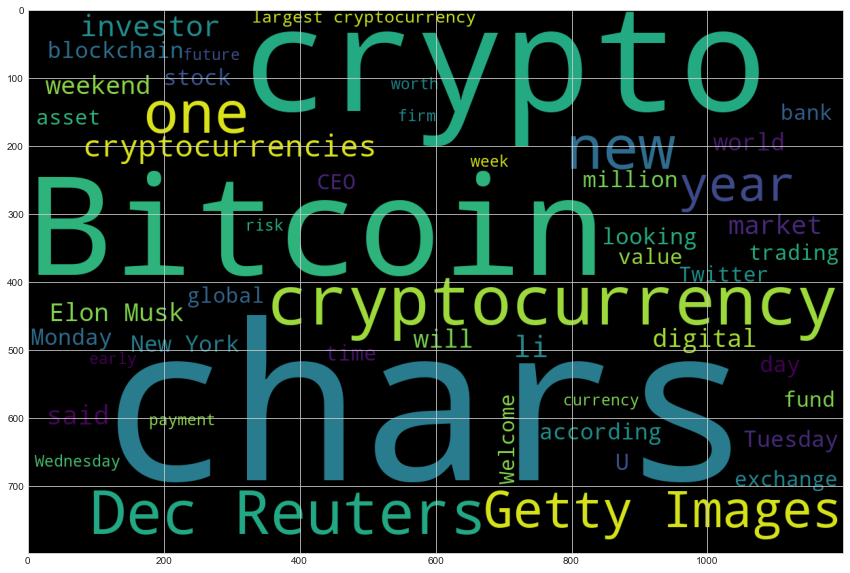

In [49]:

# Generate the Bitcoin word cloud
# YOUR CODE HERE!

wc = WordCloud(width=1200, height=800, max_words=50).generate(btc_df.text.str.cat())
plt.imshow(wc)

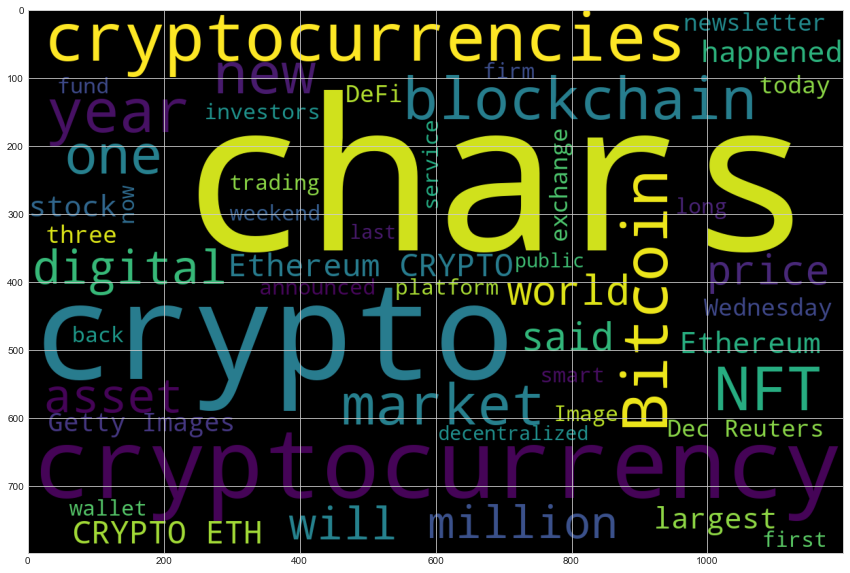

In [50]:
# Generate the Ethereum word cloud
# YOUR CODE HERE!

eth_wc = WordCloud(width=1200, height=800, max_words=50).generate(eth_df.text.str.cat())
plt.imshow(eth_wc)

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [51]:
import spacy
from spacy import displacy
from nltk.corpus import reuters

In [52]:
# Download the language model for SpaCy
!python -m spacy download en_core_web_sm

     |████████████████████████████████| 13.9 MB 6.3 MB/s eta 0:00:01
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


In [53]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [54]:
# Concatenate all of the Bitcoin text together
# YOUR CODE HERE!

bitcoin = btc_df.text.str.cat()


In [55]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

doc = nlp(bitcoin)



In [56]:

# Add a title to the document
# YOUR CODE HERE!

doc.user_data["title"] = "Bitcoin NER"

In [57]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(doc, style='ent')


In [58]:
# List all Entities
# YOUR CODE HERE!

print([ent.text for ent in doc.ents if ent.label_ == 'GPE'])


['US', 'Miami', 'Clearwater Beach', 'Clearwater Beach', 'Florida', 'Germany', 'chars]NEW YORK/LONDON/', 'HONG KONG', 'Getty Images', 'Wyoming', 'US', 'Denver', 'Wyoming', 'America', 'Britain', 'Turkey', 'Miami', 'Miami', 'New York City', 'Turkey', 'India', 'America', 'El Salvador', 'Tehran', 'Iran', 'New York', 'New York', 'Russia', 'Ubisoft', 'Fla.', 'U.S.', 'Kenya', 'U.S.', 'documents</li></ul', 'New York', 'US', 'El Salvador']


---

### Ethereum NER

In [59]:
# Concatenate all of the Ethereum text together
# YOUR CODE HERE!


ethereum = eth_df.text.str.cat()


In [60]:
# Run the NER processor on all of the text
# YOUR CODE HERE!

eth_doc = nlp(ethereum)


In [61]:
# Add a title to the document
# YOUR CODE HERE!

eth_doc.user_data["title"] = "Ethereum NER"


In [62]:
# Render the visualization
# YOUR CODE HERE!

displacy.render(eth_doc, style='ent')


In [63]:
# List all Entities
# YOUR CODE HERE!

print([ent.text for ent in eth_doc.ents if ent.label_ == 'GPE'])


['Clearwater Beach', 'Clearwater Beach', 'Florida', 'Germany', 'DeFi', 'DeFi', 'DeFi', 'Ubisoft', 'Bitmar', 'Alphabet', 'DeFi', 'AI', 'DeFi', 'DeFi', 'America', 'El Salvador', 'US', 'US', 'AI', 'Singapore', 'Ill', 'Ethereu']


---